In [38]:
import pandas as pd

data=pd.read_csv('titanic.csv')

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data[data['Age'].isnull()].shape

(177, 12)

In [41]:
#Finding the no. of NaNs for each Attribute
for col in data.columns:
    print(col,data[data[col].isnull()].shape)

PassengerId (0, 12)
Survived (0, 12)
Pclass (0, 12)
Name (0, 12)
Sex (0, 12)
Age (177, 12)
SibSp (0, 12)
Parch (0, 12)
Ticket (0, 12)
Fare (0, 12)
Cabin (687, 12)
Embarked (2, 12)


In [42]:
#Checking the unique values in the Embarked column
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
#Setting missing values at Embarked attribute as Southampton i.e. 'S'
for i in data.index:
    if str(data.at[i,'Embarked']) == 'nan':
        print('Setting ',i)
        data.set_value(i,'Embarked','S')

Setting  61
Setting  829


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [44]:
#Checking if all the NaNs have been removed
data[data['Embarked'].isnull()].shape

(0, 12)

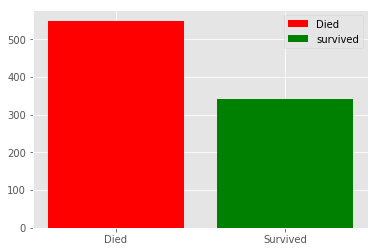

[549, 342]


In [45]:
#Plotting Dead vs Survived plot

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

plt.style.use('ggplot')
arr=np.array(data['Survived'])
dct=Counter(arr)

plt.bar([0],[dct[0]],color='r',label='Died')
plt.bar([1],[dct[1]],color='g',label='survived')
plt.xticks([0,1],['Died','Survived'])
plt.legend()
plt.show()
print(list(dct.values()))

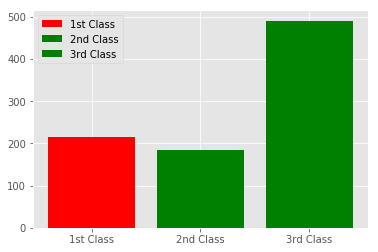

In [46]:
#plotting no of passengers vs class

classes=np.array(data['Pclass'])
classesdct=Counter(classes)
#print(classess)
plt.bar([1],[classesdct[1]],color='r',label='1st Class')
plt.bar([2],[classesdct[2]],color='g',label='2nd Class')
plt.bar([3],[classesdct[3]],color='g',label='3rd Class')
plt.xticks([1,2,3],['1st Class','2nd Class','3rd Class'])
plt.legend()
plt.show()

Counter({'male': 577, 'female': 314})


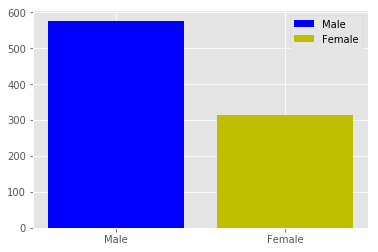

In [47]:
#Plotting gender vs no of passengers

genders=np.array(data['Sex'])
gendersdct=Counter(genders)
print(gendersdct)
plt.bar(['male'],[gendersdct['male']],color='b',label='Male')
plt.bar(['female'],[gendersdct['female']],color='y',label='Female')
plt.xticks(['male','female'],['Male','Female'])
plt.legend()
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


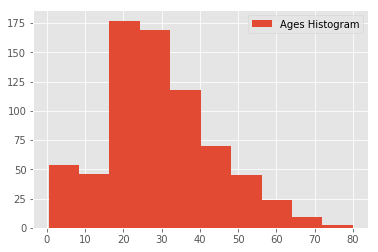

In [48]:
#Plotting histogram of ages

ages=np.array(data['Age'])
plt.hist(ages,label='Ages Histogram')
plt.legend()
plt.show()

468
81


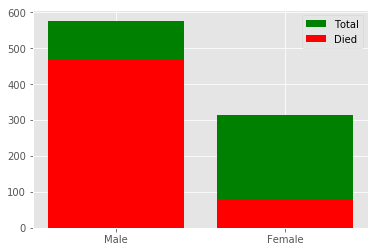

In [49]:
#Person survival plot by Sex


survived_counts=data.groupby('Sex').sum()
#print(survived_counts)
female_survived=survived_counts['Survived']['female']
male_survived=survived_counts['Survived']['male']
#print(female_survived)
#print(male_survived)

total_counts=data['Sex'].value_counts().get_values();
male_counts=total_counts[0]
female_counts=total_counts[1]

male_died=male_counts-male_survived
female_died=female_counts-female_survived

print(male_died)
print(female_died)


plt.bar(['Male'],[male_counts],color='g',label='Total')
plt.bar(['Male'],[male_died],color='r',label='Died')
plt.bar(['Female'],[female_counts],color='g')
plt.bar(['Female'],[female_died],color='r')

plt.legend()
plt.show()

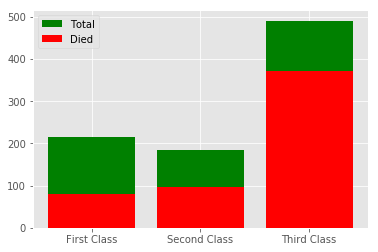

In [50]:
#Person Survival plot by Class

survived_counts=data.groupby('Pclass').sum()
# print(survived_counts)
Firstclass_survived=survived_counts['Survived'][1]
Secondclass_survived=survived_counts['Survived'][2]
Thirdclass_survived=survived_counts['Survived'][3]
# #print(female_survived)
# #print(male_survived)

total_counts=data['Pclass'].value_counts()#.get_values();
#print(total_counts)
Firstclass_counts=total_counts[1]
Secondclass_counts=total_counts[2]
Thirdclass_counts=total_counts[3]

Firstclass_died=Firstclass_counts-Firstclass_survived
Secondclass_died=Secondclass_counts-Secondclass_survived
Thirdclass_died=Thirdclass_counts-Thirdclass_survived

# print(Firstclass_died)
# print(Secondclass_died)


plt.bar(['First Class'],[Firstclass_counts],color='g',label='Total')
plt.bar(['First Class'],[Firstclass_died],color='r',label='Died')
plt.bar(['Second Class'],[Secondclass_counts],color='g')
plt.bar(['Second Class'],[Secondclass_died],color='r')
plt.bar(['Third Class'],[Thirdclass_counts],color='g')
plt.bar(['Third Class'],[Thirdclass_died],color='r')


plt.legend()
plt.show()

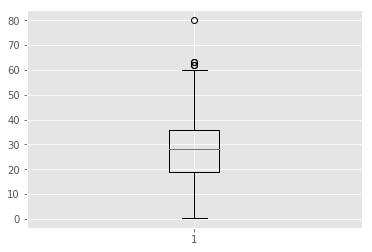

In [51]:
fdata=data.dropna(subset=['Age'],how='any')
x=np.array(fdata[fdata['Survived']==1]['Age'])
plt.boxplot(x)
plt.show()

In [52]:
import scipy.stats as stats

In [53]:
#Probability of a man having height more than 200 if the mean of all men's height in UK is 177cm with std 10cm

def prob_morethan(mean,std,range_):
    z=(range_-mean)/std;
    return 1-stats.norm.cdf(z)


prob_mt_200=prob_morethan(177,10,200)
print(prob_mt_200)

0.010724110021675837


In [54]:
mpg=[21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, \
     10.4, 14.7, 32.4, 30.4,33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7,  \
     15.0, 21.4]

hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, \
      65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]

print('Correlation-Coefficient: ',stats.pearsonr(mpg,hp)[0])

print('''\nThe negative cofficient signifies that mpg is inversely proportional to hp. Also, as it is closer 
to -1, mpg nearly have linear relationship with hp''')


Correlation-Cofficient:  -0.7761683718265864

The negative cofficient signifies that mpg is inversely proportional to hp. Also, as it is closer 
to -1, mpg nearly have linear relationship with hp


In [55]:
#Checking similiarity of two distribution using T-test

class1=np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])
class2 = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])

N=len(class1)

var_class1=class1.var(ddof=1)
var_class2=class2.var(ddof=1)

s=np.sqrt((var_class1+var_class2)/2)

#T-score
t=(class2.mean()-class1.mean())/(s*np.sqrt(2/N))

#p-value
p=1-stats.t.cdf(t,df=(2*N)-2)
print(t,2*p)

#cross-checking with scipy's builtin t-score and p-value calculator
t2, p2 = stats.ttest_ind(class2,class1)
print("t = " + str(t2))
print("p = " + str(2*p2))

print('''\nThe large T-score indicates that the distributions are 5 times as diffrent
from eachother than they are within themselves.''')

print('''\nA low p-value idicates that the data did'nt occur by chance i.e. the data
is valid.''')

5.458195056848408 3.482072285021509e-05
t = 5.458195056848408
p = 6.964144570030633e-05

The large T-score indicates that the distributions are 5 times as diffrent
from eachother than they are within themselves.

A low p-value idicates that the data did'nt occur by chance i.e. the data
is valid.


In [56]:
#Testing null hypothesis using Z-test

def prob_lt(mean,std,range_):
    z=abs(range_-mean)/std;
    return stats.norm.cdf(z)

print(prob_lt(60,3,53))

print('''\nAs the probability is high, there is a similiarity in the means of both
class and national average.''')

0.9901846713713547

As the probability is high, there is a similiarity in the means of both
class and national average.


In [57]:
trees=pd.read_csv('trees.csv')

In [58]:
trees.columns

Index(['Girth', 'Height', 'Volume'], dtype='object')

In [59]:
girth=np.array(trees['Girth'])
volume=np.array(trees['Volume'])

print('Pearson Correlation Cofficient: ',stats.pearsonr(girth,volume)[0])

print('''\nThe cofficient is very close to 1 i.e they have a linear 
relationship. Also, it is positive which means as girth increases
volume also increases''')

Pearson Correlation Cofficient:  0.9671193682556306

The cofficient is very close to 1 i.e they have a linear 
relationship. Also, it is positive which means as girth increases
volume also increases


In [90]:
#Predicting the presence of diabetes using the Pima India Dataset

diabetes=pd.read_csv('diabetes.csv')

In [93]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [134]:
x=np.array(diabetes[diabetes.columns[0:-1]])
y=np.array(diabetes[diabetes.columns[-1]])
#print(y)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [136]:
#Training

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
predicted=lr.predict(x_test[0:10])
actual=y_test[0:10]

print('Predicted: ',predicted)
print('\nActual: ',actual)

Predicted:  [0 0 0 0 1 0 0 0 0 1]

Actual:  [0 0 0 1 1 0 0 0 0 1]


In [141]:
rsq=lr.score(x_test,y_test)
print('R-Square Value: ',rsq)

R-Square Value:  0.7597402597402597


In [4]:
#Using K-Means to cluster latitute and longitude in 3 different cluster
import pandas as pd
hotel=pd.read_csv('hotel.csv')

In [5]:
hotel.head()

,address,lat,lon,title,district
0,"No.30 Youya Road, Beitou District, Taipei 1124...",25.137793,121.51495,Grand View Resort Beitou,Beitou
1,"No.28 Section 1, Minsheng East Road, Zhongshan...",25.057854,121.52409,YoMi Hotel,Zhongshan
2,"No.3 Zhongshan Road, Beitou District, Taipei 1...",25.137163,121.50544,Beitou Hot Spring Resort (Tian Yue Quan),Beitou
3,"No.18 Songgao Road, Xinyi District, Taipei 110...",25.039248,121.56741,Humble House Taipei,Xinyi
4,"4F., No.11, Sec. 2, Nanjing E. Road, Taipei 10...",25.052057,121.52831,Taipei Morning Hotel,Zhongshan


In [6]:
x=np.array(hotel[hotel.columns[1:3]])
y=np.array(hotel[hotel.columns[-1]])

x_train=x[0:81]
y_train=y[0:81]

x_test=x[81:]
y_test=y[81:]

In [7]:
from sklearn.cluster import KMeans
import numpy as np

In [8]:
#Training using KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
labels=kmeans.labels_

In [10]:
labels

array([1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1], dtype=int32)

In [11]:
kmeans.predict(x_test)

array([0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0],
      dtype=int32)

In [14]:
disdict={'Zhongshan':0,'Beitou':1,'Xinyi':2}

list(map(lambda a: disdict[a],y_test))

[0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0]